In [190]:
from os import listdir, getcwd
from os.path import isfile, join
from collections import Counter
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
import re
from pdb import set_trace
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from scipy.spatial import distance


In [191]:
# Remove punctuations
def clean(line):
    # set_trace()
    punctations = r"[!@#$%^&*)(_+=\-\{}\[\]:;\",./><?|`0-9]"
    line = re.sub(r"\n", " ", line)
    line = re.sub(punctations, " ", line)
    line = line.lower()
    return line

# Tokenize
def tokenize(lines):
    return TweetTokenizer(strip_handles=True, reduce_len=True).tokenize(clean(lines))

# Removing stop words
def remove_stopwords(tokens):
    return [x for x in tokens if x not in stopwords.words('english')]

# lemmatization
def lemmatization(tokens):
    # ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(x) for x in tokens]

# removing words with word length
def remove_words_by_len(tokens, length):
    return [x for x in tokens if len(x)>length]

# TF vectorization
def tf(tokens):
    counts = Counter(tokens)
    for word in np.unique(tokens):
        counts[word] = counts[word]/len(tokens)
        # counts[word] = counts[word]
    return counts

# Cosine similarity
def cosine_sim(u,v):
    return 1-distance.cosine(u,v)

# Cosine similarity dict
def getCosSim(doc_vector):
    for i in range(len(doc_vector)):
        for j in range(i + 1, len(doc_vector)):
            topic_dict_actual[str(i) + ' ' + str(j)] = cosine_sim(doc_vector[i], doc_vector[j])


In [192]:
# Cleaning and transforming documents
df = pd.DataFrame()
doc_list = []
for f in listdir(getcwd()):
    if isfile(join(getcwd(), f)) & ('txt' in f):
        with open(f) as txtfile:
            lines = txtfile.read()
            df = pd.concat([df, pd.DataFrame(tf(remove_words_by_len(remove_stopwords(lemmatization(tokenize(clean(lines)))),2)), index=[f.replace('.txt', '')])])
            doc_list.append(" ".join(remove_words_by_len(remove_stopwords(lemmatization(tokenize(clean(lines)))),2)))


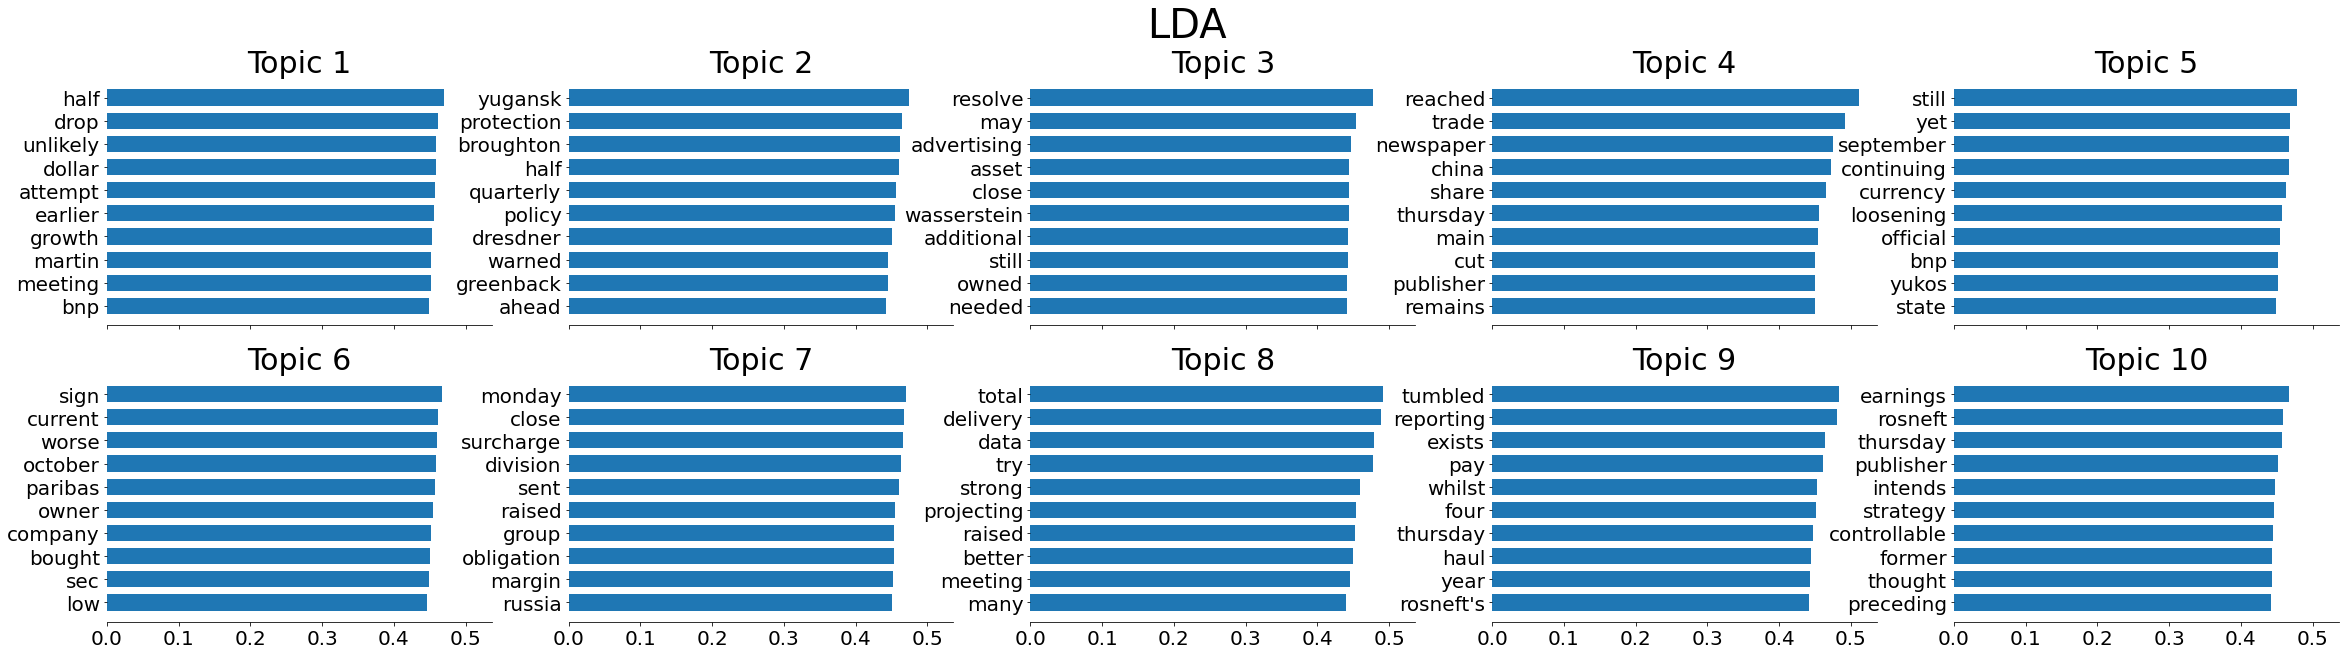

In [193]:
# Transforming and fitting LDA model
df = df.fillna(0)
lda = LatentDirichletAllocation(n_components=10, random_state=0, max_iter=20,
    learning_method="online",
    learning_offset=50.0)

model = lda.fit(df)

title = 'LDA'
n_top_words = 10
feature_names = df.columns

fig, axes = plt.subplots(2, 5, figsize=(40, 10), sharex=True)
axes = axes.flatten()

for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)



In [194]:
# Output of part a
n = 1
for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        topic_rank = 'Topic' + str(n) + ': ' + ",".join(top_features) + '\n'
        f = open("output.txt", "a")
        f.write(topic_rank)
        f.close()
        n = n+1


In [201]:
topic_dict_actual = {}
getCosSim(doc_vector)
dict_values_sorted = sorted(topic_dict_actual.values())

with open('output2.txt', 'a') as f:
    for value in dict_values_sorted:
        
        position = list(topic_dict_actual.values()).index(value)
        keyName = list(topic_dict_actual.keys())[position].split(' ')
        # print output for article similarity
        print('Article ' + keyName[0] + ' and ' + keyName[1] + ' similarity: ', value)

        line = 'Article ' + keyName[0] + ' and ' + keyName[1] + ' similarity: ' + str(value) + '\n'

        # print(line)
        # write output for article similarity
        f.write(line)


Article 0 and 2 similarity:  0.230986193133362
Article 0 and 2 similarity: 0.230986193133362

Article 0 and 1 similarity:  0.23099190171491613
Article 0 and 1 similarity: 0.23099190171491613

Article 0 and 3 similarity:  0.23099258254605481
Article 0 and 3 similarity: 0.23099258254605481

Article 2 and 3 similarity:  0.9999999999424906
Article 2 and 3 similarity: 0.9999999999424906

Article 1 and 2 similarity:  0.999999999976923
Article 1 and 2 similarity: 0.999999999976923

Article 1 and 3 similarity:  0.999999999980617
Article 1 and 3 similarity: 0.999999999980617

